# Task 2-1:  Predict Wine Quality For Red Wine 

### Task 2-1 Comprises of:
#### Experiment 1 : Basic Neural Network
#### Experiment 2 : Deep Neural Network

### Wine Quality And WIne Type Classification

The wine quality data set is from UCI Machine Learning Respository. 

White Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Red Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [2]:
whiteWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
redWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')

### Exploratory Data Analysis

In [3]:
print('whiteWine :\n')
print( whiteWine.info())
print('redWine :\n')
print(redWine.info())

whiteWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
redWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 

From observation, there are less redWine samples compared to whiteWine samples.  

In [4]:
display(redWine.head(), whiteWine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
#a function to simplify analysis of data

def dataDescribe(df):
    dfShape=df.shape
    dfInfo=df.info()
    dfTypes=df.dtypes #type of data
    dfCounts=df.apply(lambda x:x.count()) #number of sample instances
    dfNulls=df.apply(lambda x:x.isnull().sum())
    dfDistincts=df.apply(lambda x:x.unique().shape[0]) #number of distinct value for each column
    dfMax=df.apply(lambda x:x.max())
    dfMin=df.apply(lambda x:x.min())
    dfSkew=df.skew()
    dfKurtosis=df.kurt()
    
    cols=['types','count','null_entry', 'distict_value','max_value', 'min_value', 'skew','kurtosis']
    
    dfDescribe=pd.concat([dfTypes,dfCounts,dfNulls,dfDistincts,dfMax,dfMin,dfSkew,dfKurtosis],axis=1)
    
    dfDescribe.columns=cols
    
    print('Shape :', dfShape)
    print('Info :',dfInfo)
    return dfDescribe

#redWine.apply(lambda x:x.unique().shape[0])
#redWine.apply(lambda x:x.count())
#redWine.apply(lambda x:x.max())
#redWine.apply(lambda x:x.min())
#redWine.apply(lambda x:x.isnull().sum())

In [6]:
redWineDetails=dataDescribe(redWine)
display(redWineDetails)
whiteWineDetails=dataDescribe(whiteWine)
display(whiteWineDetails)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Shape : (1599, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,1599,0,96,15.90000,4.60000,0.982751,1.132143
volatile acidity,float64,1599,0,143,1.58000,0.12000,0.671593,1.225542
citric acid,float64,1599,0,80,1.00000,0.00000,0.318337,-0.788998
residual sugar,float64,1599,0,91,15.50000,0.90000,4.540655,28.617595
chlorides,float64,1599,0,153,0.61100,0.01200,5.680347,41.715787
free sulfur dioxide,float64,1599,0,60,72.00000,1.00000,1.250567,2.023562
total sulfur dioxide,float64,1599,0,144,289.00000,6.00000,1.515531,3.809824
density,float64,1599,0,436,1.00369,0.99007,0.071288,0.934079
pH,float64,1599,0,89,4.01000,2.74000,0.193683,0.806943
sulphates,float64,1599,0,96,2.00000,0.33000,2.428672,11.720251


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Shape : (4898, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,4898,0,68,14.20000,3.80000,0.647751,2.172178
volatile acidity,float64,4898,0,125,1.10000,0.08000,1.576980,5.091626
citric acid,float64,4898,0,87,1.66000,0.00000,1.281920,6.174901
residual sugar,float64,4898,0,310,65.80000,0.60000,1.077094,3.469820
chlorides,float64,4898,0,160,0.34600,0.00900,5.023331,37.564600
free sulfur dioxide,float64,4898,0,132,289.00000,2.00000,1.406745,11.466342
total sulfur dioxide,float64,4898,0,251,440.00000,9.00000,0.390710,0.571853
density,float64,4898,0,890,1.03898,0.98711,0.977773,9.793807
pH,float64,4898,0,103,3.82000,2.72000,0.457783,0.530775
sulphates,float64,4898,0,79,1.08000,0.22000,0.977194,1.590930


#### Both red wine and white wine dataset has no missing information. 

(acceptable range for being normally distributed for kurtosis is (-2,2), and for skewness is (-1,1))

* The following attributes of the White Wine are highly positve skewed:
  * volatile acidity, citric acid, chlorides, free sulphur dioxide, quality
* The following attributes of Red Wine are highly positve skewed:
  * residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates

The following attributes of White Wine have high kurtosis:
  * fixed acidity, volatile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, density
 
The following attributes of Red Wine havd high kurtosis:
  * residual sugar, chlorides, total sulphur dioxide, sulphates

### Visualizing The Data

In [7]:
def plotChart(redWine,whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title):
        fig, ax = plt.subplots(1, 2)

        ax[0].hist(redWine[chemical], 10, facecolor='red')


        ax[1].hist(whiteWine[chemical],10, facecolor='white', ec="black", lw=1)


        #ax[0].set_ylim([0, max(redWine[chemical].value_counts().max(),whiteWine[chemical].value_counts().max())])
        fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)
        ax[0].set_xlabel(xLabelRed)
        ax[0].set_ylabel(yLabel)
        ax[1].set_xlabel(xLabelWhite)
        ax[1].set_ylabel(yLabel)
        fig.suptitle(title)

        plt.show()


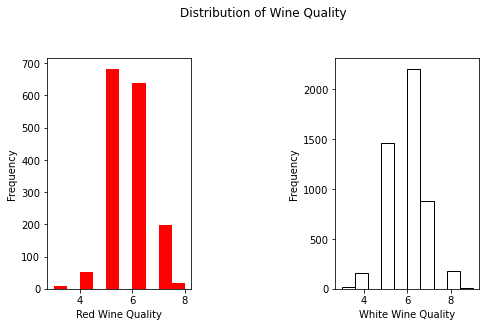

In [8]:
chemical='quality'
xLabelRed="Red Wine Quality"
xLabelWhite="White Wine Quality"
yLabel="Frequency"
title="Distribution of Wine Quality"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )



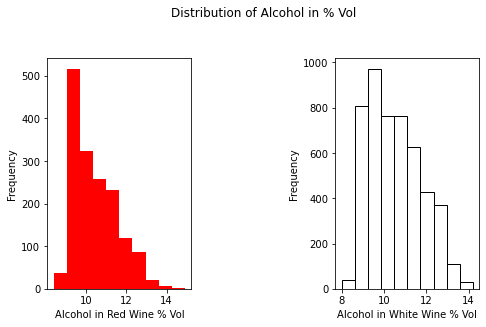

In [9]:
#Understanding Alcohol 

chemical='alcohol'
xLabelRed="Alcohol in Red Wine % Vol"
xLabelWhite="Alcohol in White Wine % Vol"
yLabel="Frequency"
title="Distribution of Alcohol in % Vol"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )


As can be observed in the chart above, alcohol levels for both red and white wine are mostly around 9-10%. Very few wines are above 14% in alcohol. 

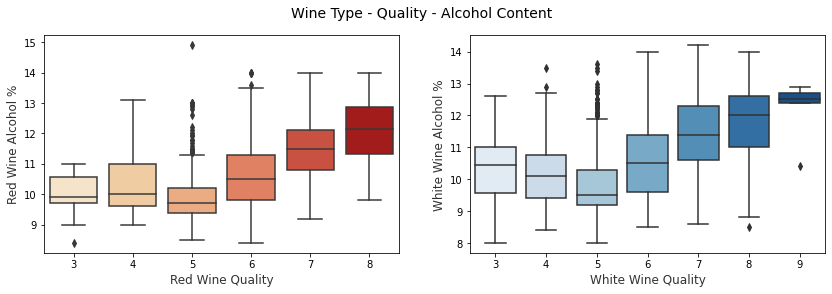

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol',ax=ax1, data=redWine, palette='OrRd')


ax1.set_xlabel("Red Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Red Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x='quality', y='alcohol', data=whiteWine, ax=ax2, palette='Blues')

ax2.set_xlabel("White Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("White Wine Alcohol %",size = 12,alpha=0.8)
plt.show()


From the chart above, it can be obseved that mean alcohol levels are higher for better wine quality rating for both red or white wine. However for average wine quality, outliers in alcohol level can be observed. Perhaps it is harder to discern average wine based on alcohol level.  

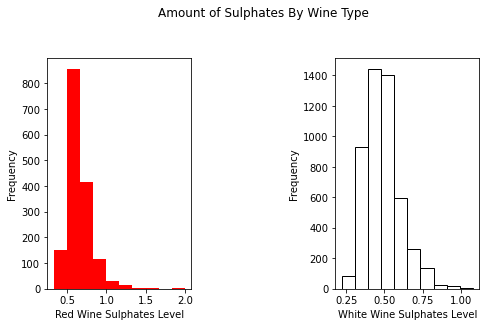

In [11]:
chemical='sulphates'
xLabelRed="Red Wine Sulphates Level"
xLabelWhite="White Wine Sulphates Level"
yLabel="Frequency"
title="Amount of Sulphates By Wine Type"

plotChart(redWine, whiteWine,chemical, xLabelRed,xLabelWhite,yLabel,title )




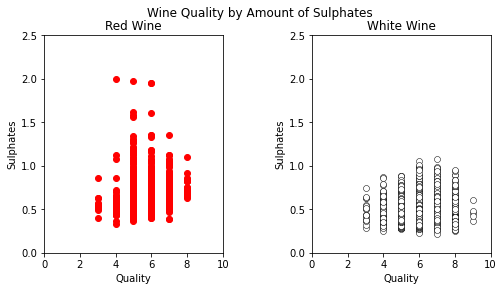

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(redWine['quality'], redWine["sulphates"], color="red")
ax[1].scatter(whiteWine['quality'], whiteWine['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Suplhates are related to the fermentation process of wine and affects the aroma and flavor. However, sulphates has been reported to cause headaches in females more often than males. 

As can be observed from the charts, red wine generally has higher levels of sulphates compared to white wine. 

From the scatter plot, higher quality red and white wines have lower levels of sulphates. 

In [13]:
subset_attributes = redWine.columns
print(subset_attributes)
rs = round(redWine.loc[:, subset_attributes].describe(),2)
#print(rs)
ws = round(whiteWine.loc[:, subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

#### Comments From Descriptive Statistics Above:
* Red wine has highter mean values of fixed acidity, volatile acidity and sulphates compared to white wine.
* White wine has higher mean values of residual sugar, free sulphur dioxide, total sulphur dioxide than red wine.
* Alcohol content does not give much variation to distiguish between White and Red Wine. 


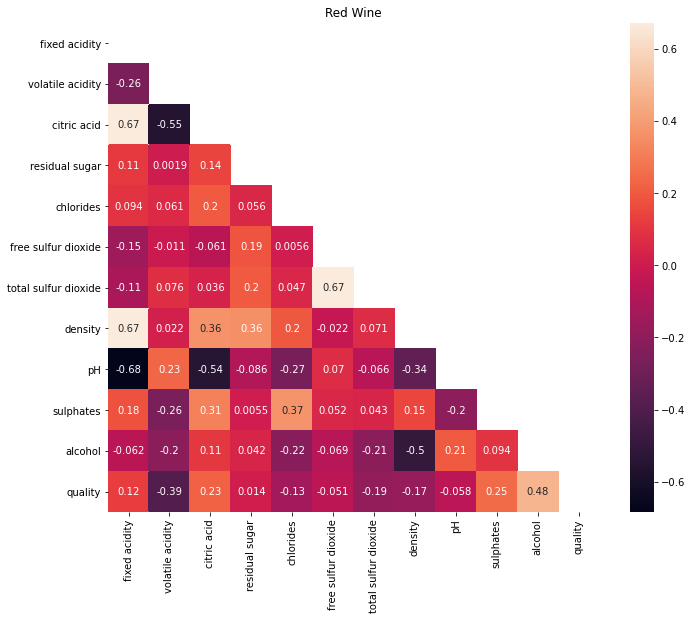

In [14]:
fig,ax=plt.subplots(figsize=(11,9))

mask = np.triu(np.ones_like(redWine.corr(), dtype=bool))

sns.heatmap(redWine.corr(), 
            mask=mask,
            annot=True
           )
            #xticklabels=redWine.corr().columns.values, 
            #yticklabels=redWine.corr().columns.values, ax=ax[0])
ax.set_title('Red Wine')

plt.show()

#### Comments on Correlations 
* For White Wine, density has relatively high positive correlation with residual sugar, and high negative correlation with alcohol. 
* For Red Wine, alcohol has high positive correlation with quality, and strong negative correlation between density and alcohol level. 
* Generally, free sulphur dioxide and total sulphur dioxide tend to positively correlate. Volatile acidity and citric acid tend to negatively correlate. 

From wine literature, density is generally used as measure of conversion of sugar to alcohol.  So in the case of white wine, the high positive correlation between density and residual sugar and negative correlation with alcohol makes sense as it reflects more conversion of sugar to alcohol. 


### Preprocess Data

This project will be predicting: 
* whether wine sample is red or white wine
* Quality of wine sample

The plan also include trying functional api with two inputs and two outputs for predicting both wine quality and wine type. 

In [15]:
#create class labels for the wine quality score. 
#this is because wine quality score for red wine does not have score 0,1,2,9 and 10.
#this missing target label supply no information on what constitutes quality score of 1,2,9 and 10.
#hence any multi-class or regression prediction using the original wine quality score will not be able to predict
#wine quality score0,1,2,9, and 10.
#A better approach is to group quality score into bands as low, average, good. 
#3,4- low. 5,6 - average, 7,8 good
#Set 'low':0, 'average':1,'good':2



redWine['quality_class']=redWine.quality.apply(lambda x: 0 if x<5 else 2 if x>6 else 1) 
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [16]:
rw_q=redWine.quality_class.value_counts()
rw_q

1    1319
2     217
0      63
Name: quality_class, dtype: int64

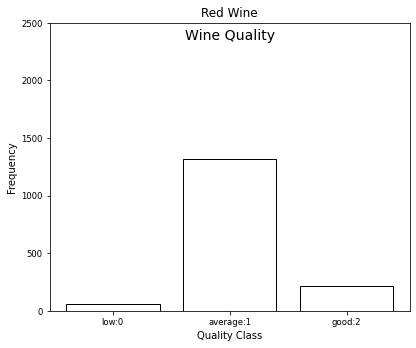

In [17]:
fig=plt.figure(figsize=(5,4))
ax= fig.add_axes([0,0,1,1])

title = fig.suptitle("Wine Quality", fontsize=14)
ax.set_title("Red Wine")
ax.set_xlabel("Quality Class")
ax.set_ylabel("Frequency") 

rw_q = redWine.quality_class.value_counts().sort_index()
rw_q = (list(rw_q.index), list(rw_q.values))
ax.set_ylim([0, 2500])
ax.tick_params(axis='both', which='major', labelsize=8.5)
ax.bar(list(range(len(rw_q[0]))), rw_q[1], color='white', 
               edgecolor='black', linewidth=1, tick_label =['low:0','average:1','good:2'])

plt.show()

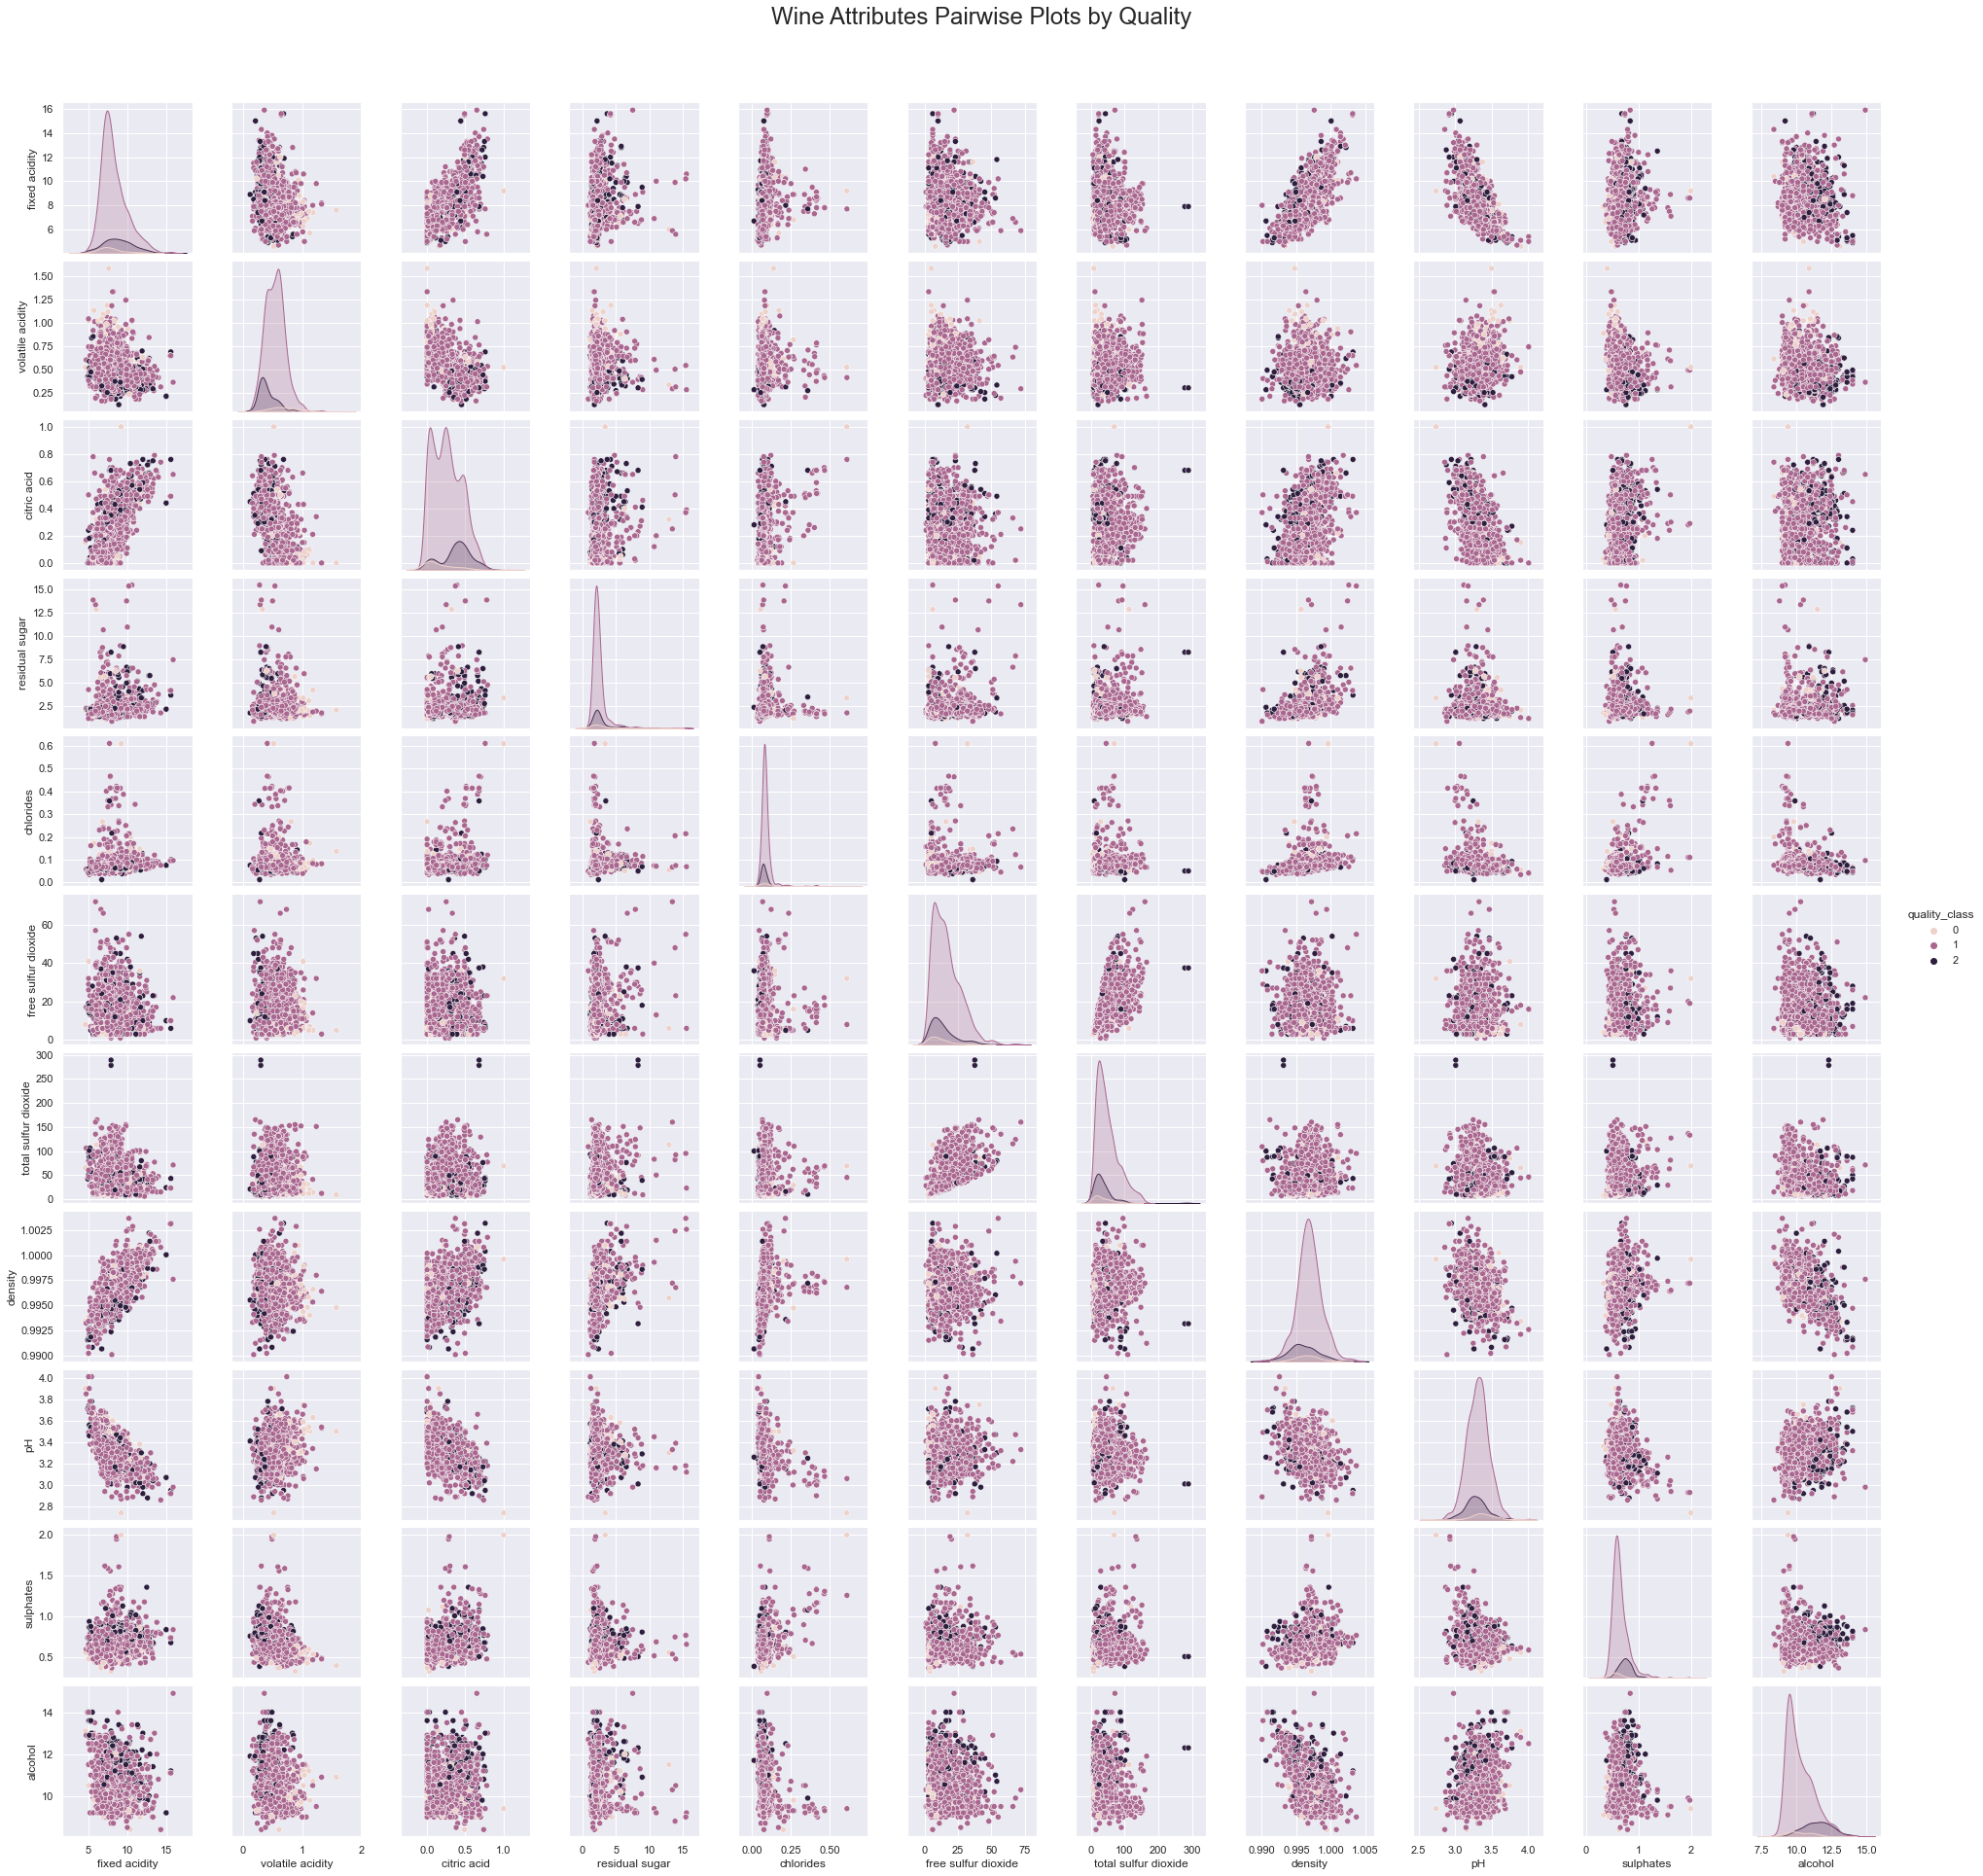

In [18]:
sns.set(font_scale=1.0)
cols = redWine.columns
cols = cols.drop('quality')
g = sns.pairplot(data = redWine.loc[:, cols], hue='quality_class')
fig = g.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Wine Attributes Pairwise Plots by Quality', fontsize=24)

plt.show()

### Train Test Split

In [19]:
X=redWine.drop(['quality','quality_class'],axis=1)
display(X.shape)
y=redWine['quality_class']
display(y.head())

(1599, 11)

0    1
1    1
2    1
3    1
4    1
Name: quality_class, dtype: int64

In [20]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
y_train[-5:]

1130    1
1294    1
860     1
1459    2
1126    1
Name: quality_class, dtype: int64

In [23]:
y_test[-5:]

1259    1
1295    1
1155    1
963     1
704     0
Name: quality_class, dtype: int64

#### Standarization of th data
It has been observed during data exploration that range of max and min values for each attributes are sometimes several magnitudes difference. 

Therefore, standarization is required for the data. StanardScaler is selected as it deals better with outliers. 

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


In [25]:
display(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(1279, 11)

(320, 11)

(1279,)

(320,)

### Create DNN Multi-Class Classifier For Wine Quality With Keras

### Wine Quality Prediction

The quality of a wine is an ordinal scale with 0 being the lowest and 10 being the best wine quality. 

The task to predict wine quality can be viewed as a ordinal regression task if we assume wine quality to be a continous variable. But this can also be viewed as a classification problem given that the number of labels for wine quality is only 10. 

This project will approach the prediction of wine quality as an ordinal regression task since the classification technique has already been used for classifying wine type. 


#### Preprocess the data


#### Set Up Neural Network Model For Multi-Class Task - Predicting Wine Quality



### Imbalance Data - Red wine and White Wine.
---deal with this. 
### SMOTE For Balancing Data
There is a problem with imbalanced classification because the minority class, in this case Red Wine,is outnumbered by almost three times (4898 white wine samples vs 1599 red wine samples). 

THe approach to solve this problem is to oversample the examples in the minority class. This can be achieved by synthesizing new examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional indormation to the model. 

The technique used here is called Synthetic Minority Oversampling Technique (SMOTE). 


<AxesSubplot:xlabel='quality_class', ylabel='count'>

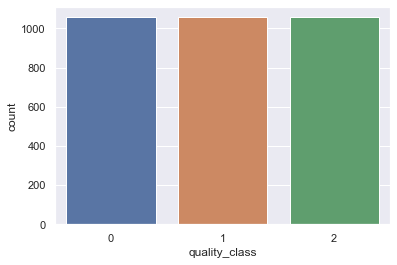

In [26]:
from imblearn.over_sampling import SMOTE 
#import imbalanced-learn python library.
oversample=SMOTE(random_state=42)
X_smote_train,y_smote_train=oversample.fit_resample(X_train,y_train)

sns.countplot(x=y_smote_train)

In [27]:
type(y_smote_train)

pandas.core.series.Series

In [28]:
X_smote_train[0:5,:]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828]])

### Experiment 1- Basic Neural Network

* Fully Connected
* Feedforward
* 1 hidden layer, no regularization, learning rate-0.01
* as rule of thumb, number of neurons in hidden layer should be less than twice of input. 


In [29]:
%%time

from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import metrics

epoch_set=200
seed = 42
np.random.seed(seed)
history=[]
m=None
cvscores=[]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_smote_train, y_smote_train):
    print(train.shape, test.shape)
    #print(X_smote_train.iloc[train,:])
    model = Sequential()
    model.add(Dense(20, input_dim=11, activation='relu'))
    
    model.add(Dense(3,activation='softmax')) #there are 3 labels of wine quality class.
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    m=model
    
    h=(model.fit(X_smote_train[train,:], y_smote_train[train], batch_size=32,epochs=epoch_set,verbose=1,
                validation_data=(X_smote_train[test], y_smote_train[test])
                
                
                )) 
    
    #shuffle=True, validation_data=(X_test,y_test_enc)
    history.append(h)
    
    #scores = model.evaluate(X_smote_train[test], y_train_enc[test], verbose=1)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    #cvscores.append(scores[1] * 100)
#print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

(2536,) (635,)
Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 0.7224 - sparse_categorical_accuracy: 0.6905 - val_loss: 0.6560 - val_sparse_categorical_accuracy: 0.7307
Epoch 2/200
80/80 [==============================] - 0s 877us/step - loss: 0.6008 - sparse_categorical_accuracy: 0.7622 - val_loss: 0.6016 - val_sparse_categorical_accuracy: 0.7575
Epoch 3/200
80/80 [==============================] - 0s 845us/step - loss: 0.5485 - sparse_categorical_accuracy: 0.7804 - val_loss: 0.5483 - val_sparse_categorical_accuracy: 0.7717
Epoch 4/200
80/80 [==============================] - 0s 830us/step - loss: 0.5098 - sparse_categorical_accuracy: 0.8009 - val_loss: 0.5259 - val_sparse_categorical_accuracy: 0.7953
Epoch 5/200
80/80 [==============================] - 0s 835us/step - loss: 0.4756 - sparse_categorical_accuracy: 0.8226 - val_loss: 0.5054 - val_sparse_categorical_accuracy: 0.8016
Epoch 6/200
80/80 [==============================] - 0s 836us/step - loss: 0.4637 

Epoch 46/200
80/80 [==============================] - 0s 865us/step - loss: 0.2516 - sparse_categorical_accuracy: 0.9125 - val_loss: 0.3618 - val_sparse_categorical_accuracy: 0.8772
Epoch 47/200
80/80 [==============================] - 0s 834us/step - loss: 0.2691 - sparse_categorical_accuracy: 0.9085 - val_loss: 0.3487 - val_sparse_categorical_accuracy: 0.8693
Epoch 48/200
80/80 [==============================] - 0s 827us/step - loss: 0.2520 - sparse_categorical_accuracy: 0.9125 - val_loss: 0.3782 - val_sparse_categorical_accuracy: 0.8803
Epoch 49/200
80/80 [==============================] - 0s 826us/step - loss: 0.2615 - sparse_categorical_accuracy: 0.9077 - val_loss: 0.3725 - val_sparse_categorical_accuracy: 0.8803
Epoch 50/200
80/80 [==============================] - 0s 806us/step - loss: 0.2450 - sparse_categorical_accuracy: 0.9113 - val_loss: 0.3687 - val_sparse_categorical_accuracy: 0.8819
Epoch 51/200
80/80 [==============================] - 0s 825us/step - loss: 0.2532 - spars

80/80 [==============================] - 0s 905us/step - loss: 0.2157 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.3447 - val_sparse_categorical_accuracy: 0.8835
Epoch 92/200
80/80 [==============================] - 0s 771us/step - loss: 0.2209 - sparse_categorical_accuracy: 0.9282 - val_loss: 0.3892 - val_sparse_categorical_accuracy: 0.8787
Epoch 93/200
80/80 [==============================] - 0s 915us/step - loss: 0.2109 - sparse_categorical_accuracy: 0.9267 - val_loss: 0.3421 - val_sparse_categorical_accuracy: 0.8945
Epoch 94/200
80/80 [==============================] - 0s 789us/step - loss: 0.2116 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.3716 - val_sparse_categorical_accuracy: 0.8835
Epoch 95/200
80/80 [==============================] - 0s 826us/step - loss: 0.2126 - sparse_categorical_accuracy: 0.9255 - val_loss: 0.3397 - val_sparse_categorical_accuracy: 0.8913
Epoch 96/200
80/80 [==============================] - 0s 839us/step - loss: 0.2135 - sparse_categorical

Epoch 136/200
80/80 [==============================] - 0s 894us/step - loss: 0.2013 - sparse_categorical_accuracy: 0.9353 - val_loss: 0.3687 - val_sparse_categorical_accuracy: 0.8866
Epoch 137/200
80/80 [==============================] - 0s 782us/step - loss: 0.2026 - sparse_categorical_accuracy: 0.9338 - val_loss: 0.4015 - val_sparse_categorical_accuracy: 0.8819
Epoch 138/200
80/80 [==============================] - 0s 852us/step - loss: 0.2009 - sparse_categorical_accuracy: 0.9290 - val_loss: 0.4334 - val_sparse_categorical_accuracy: 0.8803
Epoch 139/200
80/80 [==============================] - 0s 835us/step - loss: 0.1954 - sparse_categorical_accuracy: 0.9345 - val_loss: 0.3426 - val_sparse_categorical_accuracy: 0.8898
Epoch 140/200
80/80 [==============================] - 0s 806us/step - loss: 0.1973 - sparse_categorical_accuracy: 0.9353 - val_loss: 0.3634 - val_sparse_categorical_accuracy: 0.8929
Epoch 141/200
80/80 [==============================] - 0s 867us/step - loss: 0.1948 -

Epoch 181/200
80/80 [==============================] - 0s 841us/step - loss: 0.1892 - sparse_categorical_accuracy: 0.9377 - val_loss: 0.3841 - val_sparse_categorical_accuracy: 0.8929
Epoch 182/200
80/80 [==============================] - 0s 850us/step - loss: 0.1835 - sparse_categorical_accuracy: 0.9424 - val_loss: 0.3542 - val_sparse_categorical_accuracy: 0.8961
Epoch 183/200
80/80 [==============================] - 0s 835us/step - loss: 0.1842 - sparse_categorical_accuracy: 0.9420 - val_loss: 0.3930 - val_sparse_categorical_accuracy: 0.8961
Epoch 184/200
80/80 [==============================] - 0s 843us/step - loss: 0.1851 - sparse_categorical_accuracy: 0.9361 - val_loss: 0.3965 - val_sparse_categorical_accuracy: 0.8787
Epoch 185/200
80/80 [==============================] - 0s 843us/step - loss: 0.2081 - sparse_categorical_accuracy: 0.9231 - val_loss: 0.4189 - val_sparse_categorical_accuracy: 0.8850
Epoch 186/200
80/80 [==============================] - 0s 844us/step - loss: 0.1993 -

Epoch 26/200
80/80 [==============================] - 0s 865us/step - loss: 0.3234 - sparse_categorical_accuracy: 0.8829 - val_loss: 0.3652 - val_sparse_categorical_accuracy: 0.8738
Epoch 27/200
80/80 [==============================] - 0s 857us/step - loss: 0.3233 - sparse_categorical_accuracy: 0.8849 - val_loss: 0.4116 - val_sparse_categorical_accuracy: 0.8517
Epoch 28/200
80/80 [==============================] - 0s 892us/step - loss: 0.3224 - sparse_categorical_accuracy: 0.8814 - val_loss: 0.3737 - val_sparse_categorical_accuracy: 0.8580
Epoch 29/200
80/80 [==============================] - 0s 790us/step - loss: 0.3145 - sparse_categorical_accuracy: 0.8877 - val_loss: 0.3732 - val_sparse_categorical_accuracy: 0.8675
Epoch 30/200
80/80 [==============================] - 0s 830us/step - loss: 0.3154 - sparse_categorical_accuracy: 0.8849 - val_loss: 0.3696 - val_sparse_categorical_accuracy: 0.8628
Epoch 31/200
80/80 [==============================] - 0s 837us/step - loss: 0.3084 - spars

80/80 [==============================] - 0s 808us/step - loss: 0.2491 - sparse_categorical_accuracy: 0.9089 - val_loss: 0.3725 - val_sparse_categorical_accuracy: 0.8738
Epoch 72/200
80/80 [==============================] - 0s 897us/step - loss: 0.2699 - sparse_categorical_accuracy: 0.9042 - val_loss: 0.4016 - val_sparse_categorical_accuracy: 0.8565
Epoch 73/200
80/80 [==============================] - 0s 818us/step - loss: 0.2559 - sparse_categorical_accuracy: 0.9058 - val_loss: 0.3921 - val_sparse_categorical_accuracy: 0.8517
Epoch 74/200
80/80 [==============================] - 0s 828us/step - loss: 0.2537 - sparse_categorical_accuracy: 0.9078 - val_loss: 0.3701 - val_sparse_categorical_accuracy: 0.8707
Epoch 75/200
80/80 [==============================] - 0s 815us/step - loss: 0.2593 - sparse_categorical_accuracy: 0.9026 - val_loss: 0.3895 - val_sparse_categorical_accuracy: 0.8470
Epoch 76/200
80/80 [==============================] - 0s 869us/step - loss: 0.2527 - sparse_categorical

Epoch 116/200
80/80 [==============================] - 0s 794us/step - loss: 0.2405 - sparse_categorical_accuracy: 0.9184 - val_loss: 0.4238 - val_sparse_categorical_accuracy: 0.8596
Epoch 117/200
80/80 [==============================] - 0s 821us/step - loss: 0.2462 - sparse_categorical_accuracy: 0.9089 - val_loss: 0.3886 - val_sparse_categorical_accuracy: 0.8738
Epoch 118/200
80/80 [==============================] - 0s 834us/step - loss: 0.2302 - sparse_categorical_accuracy: 0.9176 - val_loss: 0.3868 - val_sparse_categorical_accuracy: 0.8691
Epoch 119/200
80/80 [==============================] - 0s 865us/step - loss: 0.2287 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.4331 - val_sparse_categorical_accuracy: 0.8580
Epoch 120/200
80/80 [==============================] - 0s 787us/step - loss: 0.2397 - sparse_categorical_accuracy: 0.9160 - val_loss: 0.4140 - val_sparse_categorical_accuracy: 0.8675
Epoch 121/200
80/80 [==============================] - 0s 857us/step - loss: 0.2389 -

Epoch 161/200
80/80 [==============================] - 0s 796us/step - loss: 0.2168 - sparse_categorical_accuracy: 0.9227 - val_loss: 0.4066 - val_sparse_categorical_accuracy: 0.8628
Epoch 162/200
80/80 [==============================] - 0s 833us/step - loss: 0.2182 - sparse_categorical_accuracy: 0.9267 - val_loss: 0.4271 - val_sparse_categorical_accuracy: 0.8691
Epoch 163/200
80/80 [==============================] - 0s 842us/step - loss: 0.2218 - sparse_categorical_accuracy: 0.9220 - val_loss: 0.4049 - val_sparse_categorical_accuracy: 0.8675
Epoch 164/200
80/80 [==============================] - 0s 847us/step - loss: 0.2330 - sparse_categorical_accuracy: 0.9196 - val_loss: 0.4289 - val_sparse_categorical_accuracy: 0.8644
Epoch 165/200
80/80 [==============================] - 0s 826us/step - loss: 0.2224 - sparse_categorical_accuracy: 0.9184 - val_loss: 0.4332 - val_sparse_categorical_accuracy: 0.8738
Epoch 166/200
80/80 [==============================] - 0s 837us/step - loss: 0.2200 -

Epoch 6/200
80/80 [==============================] - 0s 852us/step - loss: 0.4625 - sparse_categorical_accuracy: 0.8187 - val_loss: 0.4812 - val_sparse_categorical_accuracy: 0.7934
Epoch 7/200
80/80 [==============================] - 0s 823us/step - loss: 0.4480 - sparse_categorical_accuracy: 0.8258 - val_loss: 0.4659 - val_sparse_categorical_accuracy: 0.8076
Epoch 8/200
80/80 [==============================] - 0s 849us/step - loss: 0.4449 - sparse_categorical_accuracy: 0.8246 - val_loss: 0.4705 - val_sparse_categorical_accuracy: 0.8060
Epoch 9/200
80/80 [==============================] - 0s 849us/step - loss: 0.4269 - sparse_categorical_accuracy: 0.8356 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.8107
Epoch 10/200
80/80 [==============================] - 0s 853us/step - loss: 0.4180 - sparse_categorical_accuracy: 0.8384 - val_loss: 0.4445 - val_sparse_categorical_accuracy: 0.8139
Epoch 11/200
80/80 [==============================] - 0s 835us/step - loss: 0.4203 - sparse_ca

80/80 [==============================] - 0s 832us/step - loss: 0.2840 - sparse_categorical_accuracy: 0.8983 - val_loss: 0.3177 - val_sparse_categorical_accuracy: 0.8991
Epoch 52/200
80/80 [==============================] - 0s 846us/step - loss: 0.2876 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.3589 - val_sparse_categorical_accuracy: 0.8864
Epoch 53/200
80/80 [==============================] - 0s 870us/step - loss: 0.2828 - sparse_categorical_accuracy: 0.8955 - val_loss: 0.3289 - val_sparse_categorical_accuracy: 0.8880
Epoch 54/200
80/80 [==============================] - 0s 823us/step - loss: 0.2741 - sparse_categorical_accuracy: 0.9007 - val_loss: 0.3204 - val_sparse_categorical_accuracy: 0.8896
Epoch 55/200
80/80 [==============================] - 0s 838us/step - loss: 0.2727 - sparse_categorical_accuracy: 0.9022 - val_loss: 0.3186 - val_sparse_categorical_accuracy: 0.8864
Epoch 56/200
80/80 [==============================] - 0s 828us/step - loss: 0.2735 - sparse_categorical

80/80 [==============================] - 0s 908us/step - loss: 0.2279 - sparse_categorical_accuracy: 0.9231 - val_loss: 0.3373 - val_sparse_categorical_accuracy: 0.8912
Epoch 97/200
80/80 [==============================] - 0s 780us/step - loss: 0.2264 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.3235 - val_sparse_categorical_accuracy: 0.8991
Epoch 98/200
80/80 [==============================] - 0s 868us/step - loss: 0.2316 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.3071 - val_sparse_categorical_accuracy: 0.9038
Epoch 99/200
80/80 [==============================] - 0s 853us/step - loss: 0.2228 - sparse_categorical_accuracy: 0.9188 - val_loss: 0.3093 - val_sparse_categorical_accuracy: 0.8991
Epoch 100/200
80/80 [==============================] - 0s 850us/step - loss: 0.2278 - sparse_categorical_accuracy: 0.9200 - val_loss: 0.3208 - val_sparse_categorical_accuracy: 0.8991
Epoch 101/200
80/80 [==============================] - 0s 812us/step - loss: 0.2261 - sparse_categoric

Epoch 141/200
80/80 [==============================] - 0s 847us/step - loss: 0.2037 - sparse_categorical_accuracy: 0.9255 - val_loss: 0.3181 - val_sparse_categorical_accuracy: 0.8959
Epoch 142/200
80/80 [==============================] - 0s 849us/step - loss: 0.2091 - sparse_categorical_accuracy: 0.9318 - val_loss: 0.3071 - val_sparse_categorical_accuracy: 0.8991
Epoch 143/200
80/80 [==============================] - 0s 863us/step - loss: 0.2035 - sparse_categorical_accuracy: 0.9231 - val_loss: 0.2866 - val_sparse_categorical_accuracy: 0.9101
Epoch 144/200
80/80 [==============================] - 0s 832us/step - loss: 0.2078 - sparse_categorical_accuracy: 0.9350 - val_loss: 0.2780 - val_sparse_categorical_accuracy: 0.9085
Epoch 145/200
80/80 [==============================] - 0s 908us/step - loss: 0.2078 - sparse_categorical_accuracy: 0.9302 - val_loss: 0.3072 - val_sparse_categorical_accuracy: 0.8943
Epoch 146/200
80/80 [==============================] - 0s 799us/step - loss: 0.2013 -

Epoch 186/200
80/80 [==============================] - 0s 755us/step - loss: 0.2179 - sparse_categorical_accuracy: 0.9263 - val_loss: 0.2902 - val_sparse_categorical_accuracy: 0.9085
Epoch 187/200
80/80 [==============================] - 0s 757us/step - loss: 0.1987 - sparse_categorical_accuracy: 0.9291 - val_loss: 0.3185 - val_sparse_categorical_accuracy: 0.9022
Epoch 188/200
80/80 [==============================] - 0s 756us/step - loss: 0.2084 - sparse_categorical_accuracy: 0.9271 - val_loss: 0.3010 - val_sparse_categorical_accuracy: 0.8991
Epoch 189/200
80/80 [==============================] - 0s 768us/step - loss: 0.1945 - sparse_categorical_accuracy: 0.9326 - val_loss: 0.3149 - val_sparse_categorical_accuracy: 0.9006
Epoch 190/200
80/80 [==============================] - 0s 755us/step - loss: 0.2001 - sparse_categorical_accuracy: 0.9322 - val_loss: 0.2854 - val_sparse_categorical_accuracy: 0.9069
Epoch 191/200
80/80 [==============================] - 0s 759us/step - loss: 0.1930 -

Epoch 31/200
80/80 [==============================] - 0s 760us/step - loss: 0.3031 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.4157 - val_sparse_categorical_accuracy: 0.8423
Epoch 32/200
80/80 [==============================] - 0s 762us/step - loss: 0.2966 - sparse_categorical_accuracy: 0.8987 - val_loss: 0.4266 - val_sparse_categorical_accuracy: 0.8454
Epoch 33/200
80/80 [==============================] - 0s 754us/step - loss: 0.3048 - sparse_categorical_accuracy: 0.8999 - val_loss: 0.4276 - val_sparse_categorical_accuracy: 0.8502
Epoch 34/200
80/80 [==============================] - 0s 757us/step - loss: 0.2992 - sparse_categorical_accuracy: 0.8936 - val_loss: 0.4058 - val_sparse_categorical_accuracy: 0.8596
Epoch 35/200
80/80 [==============================] - 0s 752us/step - loss: 0.2995 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.4259 - val_sparse_categorical_accuracy: 0.8486
Epoch 36/200
80/80 [==============================] - 0s 753us/step - loss: 0.2913 - spars

80/80 [==============================] - 0s 772us/step - loss: 0.2362 - sparse_categorical_accuracy: 0.9168 - val_loss: 0.4183 - val_sparse_categorical_accuracy: 0.8738
Epoch 77/200
80/80 [==============================] - 0s 756us/step - loss: 0.2353 - sparse_categorical_accuracy: 0.9149 - val_loss: 0.4298 - val_sparse_categorical_accuracy: 0.8659
Epoch 78/200
80/80 [==============================] - 0s 757us/step - loss: 0.2353 - sparse_categorical_accuracy: 0.9196 - val_loss: 0.4293 - val_sparse_categorical_accuracy: 0.8722
Epoch 79/200
80/80 [==============================] - 0s 747us/step - loss: 0.2348 - sparse_categorical_accuracy: 0.9129 - val_loss: 0.4201 - val_sparse_categorical_accuracy: 0.8722
Epoch 80/200
80/80 [==============================] - 0s 757us/step - loss: 0.2188 - sparse_categorical_accuracy: 0.9243 - val_loss: 0.4085 - val_sparse_categorical_accuracy: 0.8754
Epoch 81/200
80/80 [==============================] - 0s 749us/step - loss: 0.2191 - sparse_categorical

Epoch 121/200
80/80 [==============================] - 0s 747us/step - loss: 0.1995 - sparse_categorical_accuracy: 0.9310 - val_loss: 0.4210 - val_sparse_categorical_accuracy: 0.8612
Epoch 122/200
80/80 [==============================] - 0s 771us/step - loss: 0.1962 - sparse_categorical_accuracy: 0.9381 - val_loss: 0.4006 - val_sparse_categorical_accuracy: 0.8612
Epoch 123/200
80/80 [==============================] - 0s 759us/step - loss: 0.1981 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.3986 - val_sparse_categorical_accuracy: 0.8612
Epoch 124/200
80/80 [==============================] - 0s 769us/step - loss: 0.1962 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.4037 - val_sparse_categorical_accuracy: 0.8817
Epoch 125/200
80/80 [==============================] - 0s 758us/step - loss: 0.1933 - sparse_categorical_accuracy: 0.9361 - val_loss: 0.4264 - val_sparse_categorical_accuracy: 0.8722
Epoch 126/200
80/80 [==============================] - 0s 751us/step - loss: 0.1970 -

Epoch 166/200
80/80 [==============================] - 0s 762us/step - loss: 0.1903 - sparse_categorical_accuracy: 0.9346 - val_loss: 0.4875 - val_sparse_categorical_accuracy: 0.8770
Epoch 167/200
80/80 [==============================] - 0s 779us/step - loss: 0.1893 - sparse_categorical_accuracy: 0.9405 - val_loss: 0.4136 - val_sparse_categorical_accuracy: 0.8770
Epoch 168/200
80/80 [==============================] - 0s 755us/step - loss: 0.1858 - sparse_categorical_accuracy: 0.9389 - val_loss: 0.4410 - val_sparse_categorical_accuracy: 0.8722
Epoch 169/200
80/80 [==============================] - 0s 751us/step - loss: 0.1840 - sparse_categorical_accuracy: 0.9369 - val_loss: 0.4600 - val_sparse_categorical_accuracy: 0.8675
Epoch 170/200
80/80 [==============================] - 0s 760us/step - loss: 0.1854 - sparse_categorical_accuracy: 0.9397 - val_loss: 0.4551 - val_sparse_categorical_accuracy: 0.8644
Epoch 171/200
80/80 [==============================] - 0s 896us/step - loss: 0.1837 -

Epoch 11/200
80/80 [==============================] - 0s 772us/step - loss: 0.3728 - sparse_categorical_accuracy: 0.8703 - val_loss: 0.4250 - val_sparse_categorical_accuracy: 0.8391
Epoch 12/200
80/80 [==============================] - 0s 759us/step - loss: 0.3725 - sparse_categorical_accuracy: 0.8664 - val_loss: 0.4537 - val_sparse_categorical_accuracy: 0.8170
Epoch 13/200
80/80 [==============================] - 0s 756us/step - loss: 0.3632 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.4079 - val_sparse_categorical_accuracy: 0.8360
Epoch 14/200
80/80 [==============================] - 0s 768us/step - loss: 0.3521 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.4058 - val_sparse_categorical_accuracy: 0.8438
Epoch 15/200
80/80 [==============================] - 0s 766us/step - loss: 0.3445 - sparse_categorical_accuracy: 0.8786 - val_loss: 0.4108 - val_sparse_categorical_accuracy: 0.8470
Epoch 16/200
80/80 [==============================] - 0s 769us/step - loss: 0.3522 - spars

80/80 [==============================] - 0s 822us/step - loss: 0.2654 - sparse_categorical_accuracy: 0.9097 - val_loss: 0.3642 - val_sparse_categorical_accuracy: 0.8707
Epoch 57/200
80/80 [==============================] - 0s 837us/step - loss: 0.2556 - sparse_categorical_accuracy: 0.9156 - val_loss: 0.3922 - val_sparse_categorical_accuracy: 0.8612
Epoch 58/200
80/80 [==============================] - 0s 840us/step - loss: 0.2560 - sparse_categorical_accuracy: 0.9129 - val_loss: 0.3809 - val_sparse_categorical_accuracy: 0.8675
Epoch 59/200
80/80 [==============================] - 0s 833us/step - loss: 0.2565 - sparse_categorical_accuracy: 0.9133 - val_loss: 0.3813 - val_sparse_categorical_accuracy: 0.8691
Epoch 60/200
80/80 [==============================] - 0s 832us/step - loss: 0.2508 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.4036 - val_sparse_categorical_accuracy: 0.8580
Epoch 61/200
80/80 [==============================] - 0s 842us/step - loss: 0.2507 - sparse_categorical

80/80 [==============================] - 0s 885us/step - loss: 0.2376 - sparse_categorical_accuracy: 0.9137 - val_loss: 0.3759 - val_sparse_categorical_accuracy: 0.8738
Epoch 102/200
80/80 [==============================] - 0s 887us/step - loss: 0.2335 - sparse_categorical_accuracy: 0.9208 - val_loss: 0.3823 - val_sparse_categorical_accuracy: 0.8644
Epoch 103/200
80/80 [==============================] - 0s 900us/step - loss: 0.2457 - sparse_categorical_accuracy: 0.9223 - val_loss: 0.4325 - val_sparse_categorical_accuracy: 0.8675
Epoch 104/200
80/80 [==============================] - 0s 882us/step - loss: 0.2349 - sparse_categorical_accuracy: 0.9192 - val_loss: 0.3771 - val_sparse_categorical_accuracy: 0.8785
Epoch 105/200
80/80 [==============================] - 0s 892us/step - loss: 0.2263 - sparse_categorical_accuracy: 0.9168 - val_loss: 0.4553 - val_sparse_categorical_accuracy: 0.8549
Epoch 106/200
80/80 [==============================] - 0s 877us/step - loss: 0.2355 - sparse_catego

Epoch 146/200
80/80 [==============================] - 0s 889us/step - loss: 0.2274 - sparse_categorical_accuracy: 0.9180 - val_loss: 0.3738 - val_sparse_categorical_accuracy: 0.8785
Epoch 147/200
80/80 [==============================] - 0s 890us/step - loss: 0.2288 - sparse_categorical_accuracy: 0.9168 - val_loss: 0.3778 - val_sparse_categorical_accuracy: 0.8738
Epoch 148/200
80/80 [==============================] - 0s 879us/step - loss: 0.2214 - sparse_categorical_accuracy: 0.9275 - val_loss: 0.3989 - val_sparse_categorical_accuracy: 0.8801
Epoch 149/200
80/80 [==============================] - 0s 886us/step - loss: 0.2188 - sparse_categorical_accuracy: 0.9267 - val_loss: 0.4315 - val_sparse_categorical_accuracy: 0.8785
Epoch 150/200
80/80 [==============================] - 0s 895us/step - loss: 0.2226 - sparse_categorical_accuracy: 0.9235 - val_loss: 0.3635 - val_sparse_categorical_accuracy: 0.8880
Epoch 151/200
80/80 [==============================] - 0s 904us/step - loss: 0.2200 -

Epoch 191/200
80/80 [==============================] - 0s 893us/step - loss: 0.2211 - sparse_categorical_accuracy: 0.9239 - val_loss: 0.4148 - val_sparse_categorical_accuracy: 0.8738
Epoch 192/200
80/80 [==============================] - 0s 878us/step - loss: 0.2149 - sparse_categorical_accuracy: 0.9231 - val_loss: 0.4210 - val_sparse_categorical_accuracy: 0.8659
Epoch 193/200
80/80 [==============================] - 0s 891us/step - loss: 0.2095 - sparse_categorical_accuracy: 0.9283 - val_loss: 0.3718 - val_sparse_categorical_accuracy: 0.8738
Epoch 194/200
80/80 [==============================] - 0s 880us/step - loss: 0.2175 - sparse_categorical_accuracy: 0.9263 - val_loss: 0.4652 - val_sparse_categorical_accuracy: 0.8533
Epoch 195/200
80/80 [==============================] - 0s 876us/step - loss: 0.2174 - sparse_categorical_accuracy: 0.9294 - val_loss: 0.3897 - val_sparse_categorical_accuracy: 0.8801
Epoch 196/200
80/80 [==============================] - 0s 911us/step - loss: 0.2149 -

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 63        
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


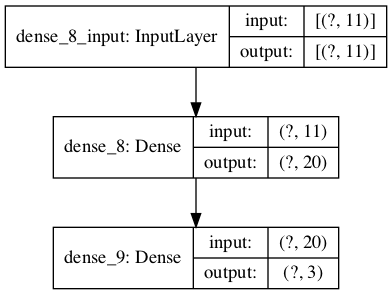

None

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [30]:
display(plot_model(m,show_shapes=True),model.summary())

display(history[0].history.keys())

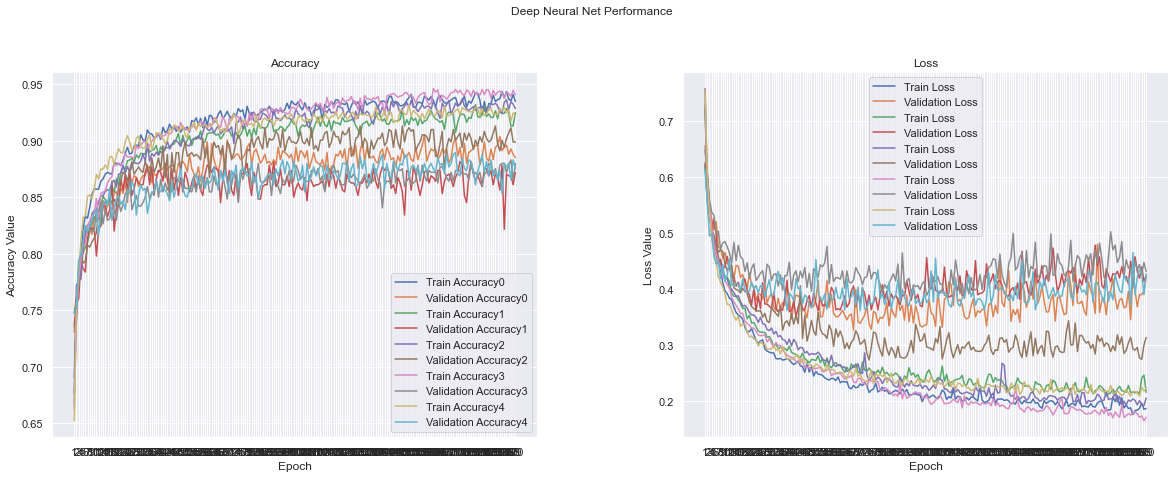

In [31]:
#the code here display all the individual K-fold loss and accuracy


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)
epochs=200
for i in range(len(history)):

    epochs = list(range(1,epoch_set+1))
    
    label="Accuracy KFold"+ str(i)

    ax1.plot(epochs, history[i].history['sparse_categorical_accuracy'], label='Train Accuracy'+str(i) )
    ax1.plot(epochs, history[i].history['val_sparse_categorical_accuracy'], label='Validation Accuracy'+str(i))
    ax1.set_xticks(epochs)
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    label="Train Loss KFold"+ str(i)
    ax2.plot(epochs, history[i].history['loss'], label='Train Loss')
    ax2.plot(epochs, history[i].history['val_loss'], label='Validation Loss')
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 7.15 µs


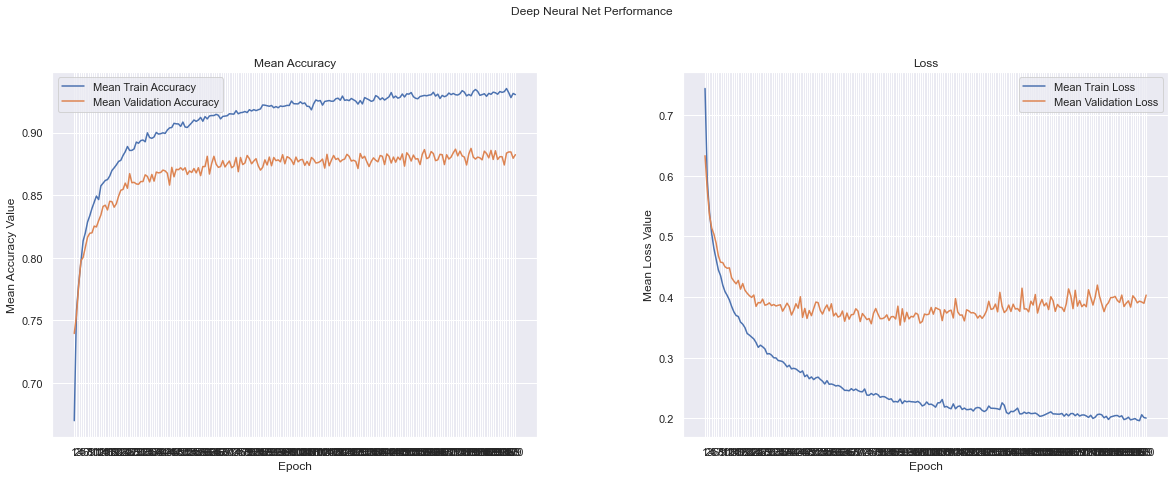

In [32]:
#Get a Cleaner Chart by taking the average element wise of each k-fold output. 
#this chart shows more clearly the trend in validation and training accuracy & loss over epoch.

%time

sca=[]
vsca=[]
l=[]
vl=[]
for i in range(len(history)):
    
    sca.append(np.array(history[i].history['sparse_categorical_accuracy']))
    vsca.append(np.array(history[i].history['val_sparse_categorical_accuracy']))
    l.append(np.array(history[i].history['loss']))
    vl.append(np.array(history[i].history['val_loss']))
    
sca=np.average(sca,axis=0)
vsca=np.average(vsca,axis=0)
l=np.average(l,axis=0)
vl=np.average(vl,axis=0)


epochs = list(range(1,epoch_set+1))
label="Accuracy KFold"
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(epochs, sca, label='Mean Train Accuracy' )
ax1.plot(epochs, vsca, label='Mean Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Mean Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean Accuracy')
l1 = ax1.legend(loc="best")

label="Train Loss KFold"
ax2.plot(epochs, l, label='Mean Train Loss')
ax2.plot(epochs, vl, label='Mean Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [33]:
y_predict=model.predict_classes(X_test)  #np.argmax(model.predict(x), axis=-1)
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report
display('confusion matrix:',confusion_matrix(y_test, y_predict))
# display('precision :',precision_score(y_test_enc, y_predict))
# display('recall :',recall_score(y_test_enc, y_predict))
# display('f1 score :', f1_score(y_test_enc,y_predict))
print(classification_report(y_test,y_predict))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
10/10 [==============================] - 0s 816us/step - loss: 0.9618 - sparse_categorical_accuracy: 0.7437
[0.9618385434150696, 0.7437499761581421]


'confusion matrix:'

array([[  3,   8,   0],
       [ 13, 197,  52],
       [  1,   8,  38]])

              precision    recall  f1-score   support

           0       0.18      0.27      0.21        11
           1       0.92      0.75      0.83       262
           2       0.42      0.81      0.55        47

    accuracy                           0.74       320
   macro avg       0.51      0.61      0.53       320
weighted avg       0.83      0.74      0.77       320



### Experiment 2: Deep Neural Network

* with kernel initializer, dropout layers larger number of neurons and kernel regularizers.
* have more hidden layers.

In [34]:
%%time

from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import metrics

epoch_set=200
seed = 42
np.random.seed(seed)
history=[]
m=None
cvscores=[]

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_smote_train, y_smote_train):
    print(train.shape, test.shape)
    #print(X_smote_train.iloc[train,:])
    model = Sequential()
    model.add(Dense(20, input_dim=11, activation='relu',kernel_initializer='he_normal'))
                    #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
    model.add(Dropout(0.5))
    model.add(Dense(20,activation='relu',kernel_initializer='he_normal'))
                    #kernel_regularizer=tf.keras.regularizers.L2(0.1)))
    model.add(Dropout(0.5))

    
    
    model.add(Dense(3,activation='softmax')) #there are 3 labels of wine quality class.
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    m=model
    
    h=(model.fit(X_smote_train[train,:], y_smote_train[train], batch_size=32,epochs=epoch_set,verbose=1,
                validation_data=(X_smote_train[test], y_smote_train[test])
                
                
                )) 
    
    #shuffle=True, validation_data=(X_test,y_test_enc)
    history.append(h)
    
    #scores = model.evaluate(X_smote_train[test], y_train_enc[test], verbose=1)
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    #cvscores.append(scores[1] * 100)
#print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
    
    
    
    

(2536,) (635,)
Epoch 1/200
80/80 [==============================] - 0s 2ms/step - loss: 1.1500 - sparse_categorical_accuracy: 0.4704 - val_loss: 0.8101 - val_sparse_categorical_accuracy: 0.6472
Epoch 2/200
80/80 [==============================] - 0s 952us/step - loss: 0.8435 - sparse_categorical_accuracy: 0.5946 - val_loss: 0.7355 - val_sparse_categorical_accuracy: 0.6630
Epoch 3/200
80/80 [==============================] - 0s 858us/step - loss: 0.7876 - sparse_categorical_accuracy: 0.6349 - val_loss: 0.6952 - val_sparse_categorical_accuracy: 0.7118
Epoch 4/200
80/80 [==============================] - 0s 799us/step - loss: 0.7382 - sparse_categorical_accuracy: 0.6700 - val_loss: 0.6545 - val_sparse_categorical_accuracy: 0.7307
Epoch 5/200
80/80 [==============================] - 0s 801us/step - loss: 0.7161 - sparse_categorical_accuracy: 0.6735 - val_loss: 0.6278 - val_sparse_categorical_accuracy: 0.7701
Epoch 6/200
80/80 [==============================] - 0s 790us/step - loss: 0.7028 

Epoch 46/200
80/80 [==============================] - 0s 798us/step - loss: 0.5894 - sparse_categorical_accuracy: 0.7441 - val_loss: 0.4918 - val_sparse_categorical_accuracy: 0.8079
Epoch 47/200
80/80 [==============================] - 0s 801us/step - loss: 0.6043 - sparse_categorical_accuracy: 0.7330 - val_loss: 0.5077 - val_sparse_categorical_accuracy: 0.7843
Epoch 48/200
80/80 [==============================] - 0s 805us/step - loss: 0.6067 - sparse_categorical_accuracy: 0.7334 - val_loss: 0.4835 - val_sparse_categorical_accuracy: 0.8031
Epoch 49/200
80/80 [==============================] - 0s 816us/step - loss: 0.5630 - sparse_categorical_accuracy: 0.7516 - val_loss: 0.5219 - val_sparse_categorical_accuracy: 0.7890
Epoch 50/200
80/80 [==============================] - 0s 804us/step - loss: 0.5764 - sparse_categorical_accuracy: 0.7496 - val_loss: 0.5071 - val_sparse_categorical_accuracy: 0.7921
Epoch 51/200
80/80 [==============================] - 0s 800us/step - loss: 0.5813 - spars

80/80 [==============================] - 0s 797us/step - loss: 0.5642 - sparse_categorical_accuracy: 0.7528 - val_loss: 0.4888 - val_sparse_categorical_accuracy: 0.7984
Epoch 92/200
80/80 [==============================] - 0s 812us/step - loss: 0.5667 - sparse_categorical_accuracy: 0.7476 - val_loss: 0.4764 - val_sparse_categorical_accuracy: 0.8110
Epoch 93/200
80/80 [==============================] - 0s 798us/step - loss: 0.5807 - sparse_categorical_accuracy: 0.7441 - val_loss: 0.4883 - val_sparse_categorical_accuracy: 0.7984
Epoch 94/200
80/80 [==============================] - 0s 809us/step - loss: 0.5625 - sparse_categorical_accuracy: 0.7453 - val_loss: 0.4881 - val_sparse_categorical_accuracy: 0.8110
Epoch 95/200
80/80 [==============================] - 0s 819us/step - loss: 0.5952 - sparse_categorical_accuracy: 0.7366 - val_loss: 0.4753 - val_sparse_categorical_accuracy: 0.8142
Epoch 96/200
80/80 [==============================] - 0s 812us/step - loss: 0.5814 - sparse_categorical

Epoch 136/200
80/80 [==============================] - 0s 801us/step - loss: 0.5814 - sparse_categorical_accuracy: 0.7429 - val_loss: 0.4668 - val_sparse_categorical_accuracy: 0.8031
Epoch 137/200
80/80 [==============================] - 0s 800us/step - loss: 0.5640 - sparse_categorical_accuracy: 0.7516 - val_loss: 0.4632 - val_sparse_categorical_accuracy: 0.8094
Epoch 138/200
80/80 [==============================] - 0s 799us/step - loss: 0.5898 - sparse_categorical_accuracy: 0.7468 - val_loss: 0.4796 - val_sparse_categorical_accuracy: 0.8094
Epoch 139/200
80/80 [==============================] - 0s 811us/step - loss: 0.5641 - sparse_categorical_accuracy: 0.7484 - val_loss: 0.4666 - val_sparse_categorical_accuracy: 0.8016
Epoch 140/200
80/80 [==============================] - 0s 799us/step - loss: 0.5609 - sparse_categorical_accuracy: 0.7551 - val_loss: 0.4719 - val_sparse_categorical_accuracy: 0.8047
Epoch 141/200
80/80 [==============================] - 0s 818us/step - loss: 0.5586 -

Epoch 181/200
80/80 [==============================] - 0s 857us/step - loss: 0.5596 - sparse_categorical_accuracy: 0.7528 - val_loss: 0.4829 - val_sparse_categorical_accuracy: 0.8031
Epoch 182/200
80/80 [==============================] - 0s 840us/step - loss: 0.5823 - sparse_categorical_accuracy: 0.7453 - val_loss: 0.4828 - val_sparse_categorical_accuracy: 0.7937
Epoch 183/200
80/80 [==============================] - 0s 845us/step - loss: 0.5687 - sparse_categorical_accuracy: 0.7437 - val_loss: 0.4924 - val_sparse_categorical_accuracy: 0.7984
Epoch 184/200
80/80 [==============================] - 0s 850us/step - loss: 0.5513 - sparse_categorical_accuracy: 0.7520 - val_loss: 0.4594 - val_sparse_categorical_accuracy: 0.8047
Epoch 185/200
80/80 [==============================] - 0s 842us/step - loss: 0.5644 - sparse_categorical_accuracy: 0.7480 - val_loss: 0.4877 - val_sparse_categorical_accuracy: 0.8063
Epoch 186/200
80/80 [==============================] - 0s 840us/step - loss: 0.5464 -

Epoch 26/200
80/80 [==============================] - 0s 836us/step - loss: 0.6296 - sparse_categorical_accuracy: 0.7182 - val_loss: 0.5199 - val_sparse_categorical_accuracy: 0.7997
Epoch 27/200
80/80 [==============================] - 0s 837us/step - loss: 0.6381 - sparse_categorical_accuracy: 0.7056 - val_loss: 0.5511 - val_sparse_categorical_accuracy: 0.7634
Epoch 28/200
80/80 [==============================] - 0s 835us/step - loss: 0.6056 - sparse_categorical_accuracy: 0.7268 - val_loss: 0.5353 - val_sparse_categorical_accuracy: 0.7744
Epoch 29/200
80/80 [==============================] - 0s 825us/step - loss: 0.6304 - sparse_categorical_accuracy: 0.7166 - val_loss: 0.5280 - val_sparse_categorical_accuracy: 0.7713
Epoch 30/200
80/80 [==============================] - 0s 839us/step - loss: 0.6274 - sparse_categorical_accuracy: 0.7320 - val_loss: 0.5196 - val_sparse_categorical_accuracy: 0.8013
Epoch 31/200
80/80 [==============================] - 0s 829us/step - loss: 0.6236 - spars

80/80 [==============================] - 0s 825us/step - loss: 0.5878 - sparse_categorical_accuracy: 0.7359 - val_loss: 0.4888 - val_sparse_categorical_accuracy: 0.7934
Epoch 72/200
80/80 [==============================] - 0s 835us/step - loss: 0.5974 - sparse_categorical_accuracy: 0.7395 - val_loss: 0.4888 - val_sparse_categorical_accuracy: 0.7886
Epoch 73/200
80/80 [==============================] - 0s 833us/step - loss: 0.5927 - sparse_categorical_accuracy: 0.7367 - val_loss: 0.4768 - val_sparse_categorical_accuracy: 0.8107
Epoch 74/200
80/80 [==============================] - 0s 832us/step - loss: 0.6144 - sparse_categorical_accuracy: 0.7335 - val_loss: 0.4970 - val_sparse_categorical_accuracy: 0.7871
Epoch 75/200
80/80 [==============================] - 0s 836us/step - loss: 0.5959 - sparse_categorical_accuracy: 0.7328 - val_loss: 0.4813 - val_sparse_categorical_accuracy: 0.8013
Epoch 76/200
80/80 [==============================] - 0s 841us/step - loss: 0.5953 - sparse_categorical

Epoch 116/200
80/80 [==============================] - 0s 825us/step - loss: 0.6074 - sparse_categorical_accuracy: 0.7213 - val_loss: 0.4903 - val_sparse_categorical_accuracy: 0.7792
Epoch 117/200
80/80 [==============================] - 0s 841us/step - loss: 0.5958 - sparse_categorical_accuracy: 0.7347 - val_loss: 0.4827 - val_sparse_categorical_accuracy: 0.8155
Epoch 118/200
80/80 [==============================] - 0s 840us/step - loss: 0.6085 - sparse_categorical_accuracy: 0.7245 - val_loss: 0.4998 - val_sparse_categorical_accuracy: 0.7871
Epoch 119/200
80/80 [==============================] - 0s 830us/step - loss: 0.5902 - sparse_categorical_accuracy: 0.7410 - val_loss: 0.4722 - val_sparse_categorical_accuracy: 0.8044
Epoch 120/200
80/80 [==============================] - 0s 835us/step - loss: 0.5815 - sparse_categorical_accuracy: 0.7501 - val_loss: 0.4610 - val_sparse_categorical_accuracy: 0.8218
Epoch 121/200
80/80 [==============================] - 0s 834us/step - loss: 0.5638 -

Epoch 161/200
80/80 [==============================] - 0s 821us/step - loss: 0.5898 - sparse_categorical_accuracy: 0.7399 - val_loss: 0.4654 - val_sparse_categorical_accuracy: 0.8139
Epoch 162/200
80/80 [==============================] - 0s 842us/step - loss: 0.5933 - sparse_categorical_accuracy: 0.7351 - val_loss: 0.4667 - val_sparse_categorical_accuracy: 0.8218
Epoch 163/200
80/80 [==============================] - 0s 836us/step - loss: 0.5803 - sparse_categorical_accuracy: 0.7308 - val_loss: 0.4646 - val_sparse_categorical_accuracy: 0.8028
Epoch 164/200
80/80 [==============================] - 0s 822us/step - loss: 0.6007 - sparse_categorical_accuracy: 0.7485 - val_loss: 0.4657 - val_sparse_categorical_accuracy: 0.8123
Epoch 165/200
80/80 [==============================] - 0s 849us/step - loss: 0.5891 - sparse_categorical_accuracy: 0.7383 - val_loss: 0.4713 - val_sparse_categorical_accuracy: 0.8107
Epoch 166/200
80/80 [==============================] - 0s 821us/step - loss: 0.5899 -

Epoch 6/200
80/80 [==============================] - 0s 843us/step - loss: 0.6921 - sparse_categorical_accuracy: 0.6941 - val_loss: 0.5954 - val_sparse_categorical_accuracy: 0.7240
Epoch 7/200
80/80 [==============================] - 0s 873us/step - loss: 0.7039 - sparse_categorical_accuracy: 0.6791 - val_loss: 0.5901 - val_sparse_categorical_accuracy: 0.7350
Epoch 8/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6873 - sparse_categorical_accuracy: 0.6949 - val_loss: 0.5601 - val_sparse_categorical_accuracy: 0.7397
Epoch 9/200
80/80 [==============================] - 0s 838us/step - loss: 0.6791 - sparse_categorical_accuracy: 0.6969 - val_loss: 0.5774 - val_sparse_categorical_accuracy: 0.7445
Epoch 10/200
80/80 [==============================] - 0s 846us/step - loss: 0.6741 - sparse_categorical_accuracy: 0.7020 - val_loss: 0.5526 - val_sparse_categorical_accuracy: 0.7571
Epoch 11/200
80/80 [==============================] - 0s 849us/step - loss: 0.6499 - sparse_cate

80/80 [==============================] - 0s 848us/step - loss: 0.5888 - sparse_categorical_accuracy: 0.7462 - val_loss: 0.4488 - val_sparse_categorical_accuracy: 0.8123
Epoch 52/200
80/80 [==============================] - 0s 850us/step - loss: 0.5973 - sparse_categorical_accuracy: 0.7501 - val_loss: 0.4856 - val_sparse_categorical_accuracy: 0.7950
Epoch 53/200
80/80 [==============================] - 0s 851us/step - loss: 0.6021 - sparse_categorical_accuracy: 0.7434 - val_loss: 0.4587 - val_sparse_categorical_accuracy: 0.8044
Epoch 54/200
80/80 [==============================] - 0s 852us/step - loss: 0.5916 - sparse_categorical_accuracy: 0.7477 - val_loss: 0.5546 - val_sparse_categorical_accuracy: 0.7886
Epoch 55/200
80/80 [==============================] - 0s 837us/step - loss: 0.5809 - sparse_categorical_accuracy: 0.7533 - val_loss: 0.4517 - val_sparse_categorical_accuracy: 0.7981
Epoch 56/200
80/80 [==============================] - 0s 853us/step - loss: 0.5992 - sparse_categorical

80/80 [==============================] - 0s 846us/step - loss: 0.6059 - sparse_categorical_accuracy: 0.7442 - val_loss: 0.4568 - val_sparse_categorical_accuracy: 0.8107
Epoch 97/200
80/80 [==============================] - 0s 851us/step - loss: 0.5886 - sparse_categorical_accuracy: 0.7442 - val_loss: 0.4460 - val_sparse_categorical_accuracy: 0.8186
Epoch 98/200
80/80 [==============================] - 0s 843us/step - loss: 0.5855 - sparse_categorical_accuracy: 0.7548 - val_loss: 0.4496 - val_sparse_categorical_accuracy: 0.7997
Epoch 99/200
80/80 [==============================] - 0s 840us/step - loss: 0.5940 - sparse_categorical_accuracy: 0.7351 - val_loss: 0.4513 - val_sparse_categorical_accuracy: 0.8139
Epoch 100/200
80/80 [==============================] - 0s 845us/step - loss: 0.5972 - sparse_categorical_accuracy: 0.7402 - val_loss: 0.4625 - val_sparse_categorical_accuracy: 0.8076
Epoch 101/200
80/80 [==============================] - 0s 848us/step - loss: 0.5816 - sparse_categoric

Epoch 141/200
80/80 [==============================] - 0s 853us/step - loss: 0.5876 - sparse_categorical_accuracy: 0.7450 - val_loss: 0.4631 - val_sparse_categorical_accuracy: 0.8076
Epoch 142/200
80/80 [==============================] - 0s 845us/step - loss: 0.5780 - sparse_categorical_accuracy: 0.7560 - val_loss: 0.4575 - val_sparse_categorical_accuracy: 0.7981
Epoch 143/200
80/80 [==============================] - 0s 842us/step - loss: 0.5828 - sparse_categorical_accuracy: 0.7493 - val_loss: 0.4700 - val_sparse_categorical_accuracy: 0.7965
Epoch 144/200
80/80 [==============================] - 0s 848us/step - loss: 0.5750 - sparse_categorical_accuracy: 0.7521 - val_loss: 0.4634 - val_sparse_categorical_accuracy: 0.8044
Epoch 145/200
80/80 [==============================] - 0s 859us/step - loss: 0.5718 - sparse_categorical_accuracy: 0.7509 - val_loss: 0.4455 - val_sparse_categorical_accuracy: 0.8139
Epoch 146/200
80/80 [==============================] - 0s 849us/step - loss: 0.5833 -

Epoch 186/200
80/80 [==============================] - 0s 846us/step - loss: 0.5880 - sparse_categorical_accuracy: 0.7529 - val_loss: 0.4481 - val_sparse_categorical_accuracy: 0.8218
Epoch 187/200
80/80 [==============================] - 0s 849us/step - loss: 0.5790 - sparse_categorical_accuracy: 0.7584 - val_loss: 0.4270 - val_sparse_categorical_accuracy: 0.8186
Epoch 188/200
80/80 [==============================] - 0s 860us/step - loss: 0.5866 - sparse_categorical_accuracy: 0.7623 - val_loss: 0.4400 - val_sparse_categorical_accuracy: 0.8249
Epoch 189/200
80/80 [==============================] - 0s 864us/step - loss: 0.5746 - sparse_categorical_accuracy: 0.7536 - val_loss: 0.4528 - val_sparse_categorical_accuracy: 0.8091
Epoch 190/200
80/80 [==============================] - 0s 855us/step - loss: 0.5952 - sparse_categorical_accuracy: 0.7422 - val_loss: 0.4590 - val_sparse_categorical_accuracy: 0.8013
Epoch 191/200
80/80 [==============================] - 0s 851us/step - loss: 0.5931 -

Epoch 31/200
80/80 [==============================] - 0s 820us/step - loss: 0.6135 - sparse_categorical_accuracy: 0.7304 - val_loss: 0.5044 - val_sparse_categorical_accuracy: 0.7934
Epoch 32/200
80/80 [==============================] - 0s 820us/step - loss: 0.6185 - sparse_categorical_accuracy: 0.7241 - val_loss: 0.5012 - val_sparse_categorical_accuracy: 0.7918
Epoch 33/200
80/80 [==============================] - 0s 827us/step - loss: 0.6170 - sparse_categorical_accuracy: 0.7387 - val_loss: 0.5112 - val_sparse_categorical_accuracy: 0.7871
Epoch 34/200
80/80 [==============================] - 0s 826us/step - loss: 0.6170 - sparse_categorical_accuracy: 0.7253 - val_loss: 0.5187 - val_sparse_categorical_accuracy: 0.7808
Epoch 35/200
80/80 [==============================] - 0s 817us/step - loss: 0.6336 - sparse_categorical_accuracy: 0.7209 - val_loss: 0.5051 - val_sparse_categorical_accuracy: 0.7871
Epoch 36/200
80/80 [==============================] - 0s 825us/step - loss: 0.5908 - spars

80/80 [==============================] - 0s 819us/step - loss: 0.5860 - sparse_categorical_accuracy: 0.7316 - val_loss: 0.5033 - val_sparse_categorical_accuracy: 0.8028
Epoch 77/200
80/80 [==============================] - 0s 827us/step - loss: 0.5965 - sparse_categorical_accuracy: 0.7347 - val_loss: 0.5058 - val_sparse_categorical_accuracy: 0.7981
Epoch 78/200
80/80 [==============================] - 0s 826us/step - loss: 0.5933 - sparse_categorical_accuracy: 0.7371 - val_loss: 0.4979 - val_sparse_categorical_accuracy: 0.7965
Epoch 79/200
80/80 [==============================] - 0s 823us/step - loss: 0.5934 - sparse_categorical_accuracy: 0.7379 - val_loss: 0.4859 - val_sparse_categorical_accuracy: 0.7918
Epoch 80/200
80/80 [==============================] - 0s 829us/step - loss: 0.6006 - sparse_categorical_accuracy: 0.7347 - val_loss: 0.4850 - val_sparse_categorical_accuracy: 0.7918
Epoch 81/200
80/80 [==============================] - 0s 926us/step - loss: 0.6144 - sparse_categorical

Epoch 121/200
80/80 [==============================] - 0s 846us/step - loss: 0.5895 - sparse_categorical_accuracy: 0.7359 - val_loss: 0.4828 - val_sparse_categorical_accuracy: 0.8013
Epoch 122/200
80/80 [==============================] - 0s 835us/step - loss: 0.5711 - sparse_categorical_accuracy: 0.7513 - val_loss: 0.4744 - val_sparse_categorical_accuracy: 0.7934
Epoch 123/200
80/80 [==============================] - 0s 839us/step - loss: 0.5747 - sparse_categorical_accuracy: 0.7383 - val_loss: 0.4779 - val_sparse_categorical_accuracy: 0.7823
Epoch 124/200
80/80 [==============================] - 0s 839us/step - loss: 0.5739 - sparse_categorical_accuracy: 0.7489 - val_loss: 0.4599 - val_sparse_categorical_accuracy: 0.7950
Epoch 125/200
80/80 [==============================] - 0s 844us/step - loss: 0.5694 - sparse_categorical_accuracy: 0.7391 - val_loss: 0.4709 - val_sparse_categorical_accuracy: 0.7839
Epoch 126/200
80/80 [==============================] - 0s 839us/step - loss: 0.5866 -

Epoch 166/200
80/80 [==============================] - 0s 848us/step - loss: 0.5422 - sparse_categorical_accuracy: 0.7580 - val_loss: 0.4649 - val_sparse_categorical_accuracy: 0.7902
Epoch 167/200
80/80 [==============================] - 0s 841us/step - loss: 0.5663 - sparse_categorical_accuracy: 0.7560 - val_loss: 0.4630 - val_sparse_categorical_accuracy: 0.8013
Epoch 168/200
80/80 [==============================] - 0s 843us/step - loss: 0.5490 - sparse_categorical_accuracy: 0.7631 - val_loss: 0.4618 - val_sparse_categorical_accuracy: 0.7934
Epoch 169/200
80/80 [==============================] - 0s 849us/step - loss: 0.5826 - sparse_categorical_accuracy: 0.7493 - val_loss: 0.4677 - val_sparse_categorical_accuracy: 0.7934
Epoch 170/200
80/80 [==============================] - 0s 844us/step - loss: 0.5521 - sparse_categorical_accuracy: 0.7607 - val_loss: 0.4884 - val_sparse_categorical_accuracy: 0.8013
Epoch 171/200
80/80 [==============================] - 0s 858us/step - loss: 0.5765 -

Epoch 11/200
80/80 [==============================] - 0s 844us/step - loss: 0.6729 - sparse_categorical_accuracy: 0.7024 - val_loss: 0.5470 - val_sparse_categorical_accuracy: 0.7634
Epoch 12/200
80/80 [==============================] - 0s 841us/step - loss: 0.6709 - sparse_categorical_accuracy: 0.7063 - val_loss: 0.5554 - val_sparse_categorical_accuracy: 0.7713
Epoch 13/200
80/80 [==============================] - 0s 841us/step - loss: 0.6635 - sparse_categorical_accuracy: 0.7071 - val_loss: 0.5316 - val_sparse_categorical_accuracy: 0.7618
Epoch 14/200
80/80 [==============================] - 0s 849us/step - loss: 0.6547 - sparse_categorical_accuracy: 0.7190 - val_loss: 0.5293 - val_sparse_categorical_accuracy: 0.7744
Epoch 15/200
80/80 [==============================] - 0s 844us/step - loss: 0.6570 - sparse_categorical_accuracy: 0.7272 - val_loss: 0.5232 - val_sparse_categorical_accuracy: 0.7634
Epoch 16/200
80/80 [==============================] - 0s 839us/step - loss: 0.6563 - spars

80/80 [==============================] - 0s 845us/step - loss: 0.6079 - sparse_categorical_accuracy: 0.7469 - val_loss: 0.5039 - val_sparse_categorical_accuracy: 0.7997
Epoch 57/200
80/80 [==============================] - 0s 858us/step - loss: 0.6066 - sparse_categorical_accuracy: 0.7434 - val_loss: 0.4794 - val_sparse_categorical_accuracy: 0.8044
Epoch 58/200
80/80 [==============================] - 0s 837us/step - loss: 0.5877 - sparse_categorical_accuracy: 0.7485 - val_loss: 0.4878 - val_sparse_categorical_accuracy: 0.7997
Epoch 59/200
80/80 [==============================] - 0s 866us/step - loss: 0.5969 - sparse_categorical_accuracy: 0.7410 - val_loss: 0.4802 - val_sparse_categorical_accuracy: 0.8044
Epoch 60/200
80/80 [==============================] - 0s 873us/step - loss: 0.6086 - sparse_categorical_accuracy: 0.7442 - val_loss: 0.4869 - val_sparse_categorical_accuracy: 0.7997
Epoch 61/200
80/80 [==============================] - 0s 867us/step - loss: 0.6129 - sparse_categorical

80/80 [==============================] - 0s 887us/step - loss: 0.6106 - sparse_categorical_accuracy: 0.7410 - val_loss: 0.4683 - val_sparse_categorical_accuracy: 0.8107
Epoch 102/200
80/80 [==============================] - 0s 870us/step - loss: 0.5793 - sparse_categorical_accuracy: 0.7458 - val_loss: 0.4617 - val_sparse_categorical_accuracy: 0.8044
Epoch 103/200
80/80 [==============================] - 0s 859us/step - loss: 0.5836 - sparse_categorical_accuracy: 0.7529 - val_loss: 0.4692 - val_sparse_categorical_accuracy: 0.7950
Epoch 104/200
80/80 [==============================] - 0s 864us/step - loss: 0.5850 - sparse_categorical_accuracy: 0.7489 - val_loss: 0.4700 - val_sparse_categorical_accuracy: 0.8060
Epoch 105/200
80/80 [==============================] - 0s 859us/step - loss: 0.6005 - sparse_categorical_accuracy: 0.7477 - val_loss: 0.4695 - val_sparse_categorical_accuracy: 0.8028
Epoch 106/200
80/80 [==============================] - 0s 878us/step - loss: 0.5959 - sparse_catego

Epoch 146/200
80/80 [==============================] - 0s 873us/step - loss: 0.5927 - sparse_categorical_accuracy: 0.7410 - val_loss: 0.4351 - val_sparse_categorical_accuracy: 0.8202
Epoch 147/200
80/80 [==============================] - 0s 861us/step - loss: 0.5969 - sparse_categorical_accuracy: 0.7466 - val_loss: 0.4536 - val_sparse_categorical_accuracy: 0.8091
Epoch 148/200
80/80 [==============================] - 0s 886us/step - loss: 0.5868 - sparse_categorical_accuracy: 0.7466 - val_loss: 0.4530 - val_sparse_categorical_accuracy: 0.8123
Epoch 149/200
80/80 [==============================] - 0s 879us/step - loss: 0.5926 - sparse_categorical_accuracy: 0.7446 - val_loss: 0.4498 - val_sparse_categorical_accuracy: 0.8202
Epoch 150/200
80/80 [==============================] - 0s 876us/step - loss: 0.5834 - sparse_categorical_accuracy: 0.7485 - val_loss: 0.4513 - val_sparse_categorical_accuracy: 0.8170
Epoch 151/200
80/80 [==============================] - 0s 867us/step - loss: 0.5785 -

Epoch 191/200
80/80 [==============================] - 0s 863us/step - loss: 0.5789 - sparse_categorical_accuracy: 0.7497 - val_loss: 0.4622 - val_sparse_categorical_accuracy: 0.7997
Epoch 192/200
80/80 [==============================] - 0s 871us/step - loss: 0.5852 - sparse_categorical_accuracy: 0.7489 - val_loss: 0.4590 - val_sparse_categorical_accuracy: 0.8123
Epoch 193/200
80/80 [==============================] - 0s 859us/step - loss: 0.5741 - sparse_categorical_accuracy: 0.7544 - val_loss: 0.4582 - val_sparse_categorical_accuracy: 0.8076
Epoch 194/200
80/80 [==============================] - 0s 868us/step - loss: 0.5856 - sparse_categorical_accuracy: 0.7367 - val_loss: 0.4512 - val_sparse_categorical_accuracy: 0.8139
Epoch 195/200
80/80 [==============================] - 0s 863us/step - loss: 0.5671 - sparse_categorical_accuracy: 0.7517 - val_loss: 0.4467 - val_sparse_categorical_accuracy: 0.8139
Epoch 196/200
80/80 [==============================] - 0s 865us/step - loss: 0.5805 -

The wall time means that a clock hanging on a wall outside of the computer would measure 7.54 s from the time the code was submitted to the CPU to the time when the process completed.

User time and sys time both refer to time taken by the CPU to actually work on the code. 

The CPU time dedicated to our code is only a fraction of the wall time as the CPU swaps its attention from our code to other processes that are running on the system.

User time is the amount of CPU time taken outside of the kernel. 

Sys time is the amount of time taken inside of the kernel. 

The actual CPU time used by the process is user time + sys time. 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                240       
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                420       
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 3)                 63        
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


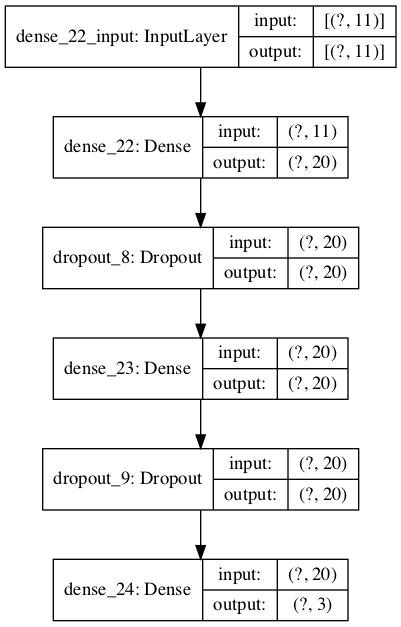

None

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [35]:
display(plot_model(m,show_shapes=True),model.summary())

display(history[0].history.keys())

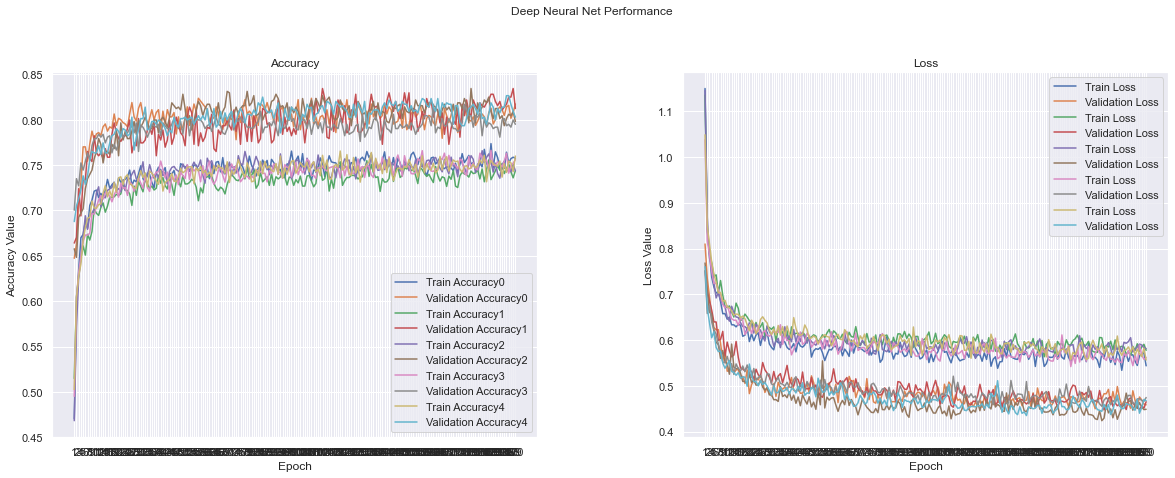

In [36]:
#the code here display all the individual K-fold loss and accuracy


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)
epochs=200
for i in range(len(history)):

    epochs = list(range(1,epoch_set+1))
    
    label="Accuracy KFold"+ str(i)

    ax1.plot(epochs, history[i].history['sparse_categorical_accuracy'], label='Train Accuracy'+str(i) )
    ax1.plot(epochs, history[i].history['val_sparse_categorical_accuracy'], label='Validation Accuracy'+str(i))
    ax1.set_xticks(epochs)
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    label="Train Loss KFold"+ str(i)
    ax2.plot(epochs, history[i].history['loss'], label='Train Loss')
    ax2.plot(epochs, history[i].history['val_loss'], label='Validation Loss')
    ax2.set_xticks(epochs)
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs


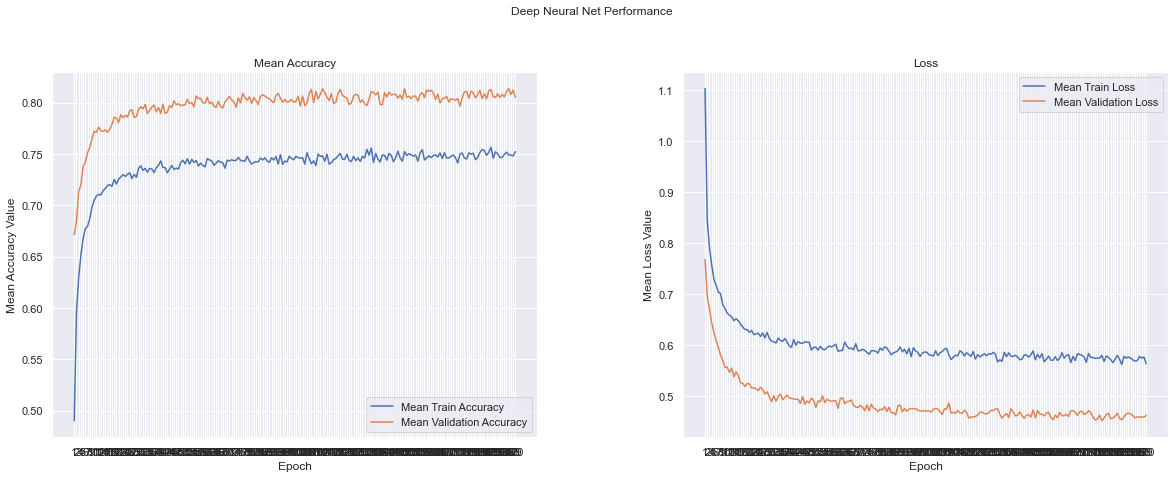

In [37]:
#Get a Cleaner Chart by taking the average element wise of each k-fold output. 
#this chart shows more clearly the trend in validation and training accuracy & loss over epoch.

%time

sca=[]
vsca=[]
l=[]
vl=[]
for i in range(len(history)):
    
    sca.append(np.array(history[i].history['sparse_categorical_accuracy']))
    vsca.append(np.array(history[i].history['val_sparse_categorical_accuracy']))
    l.append(np.array(history[i].history['loss']))
    vl.append(np.array(history[i].history['val_loss']))
    
sca=np.average(sca,axis=0)
vsca=np.average(vsca,axis=0)
l=np.average(l,axis=0)
vl=np.average(vl,axis=0)


epochs = list(range(1,epoch_set+1))
label="Accuracy KFold"
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.plot(epochs, sca, label='Mean Train Accuracy' )
ax1.plot(epochs, vsca, label='Mean Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Mean Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean Accuracy')
l1 = ax1.legend(loc="best")

label="Train Loss KFold"
ax2.plot(epochs, l, label='Mean Train Loss')
ax2.plot(epochs, vl, label='Mean Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [38]:
y_predict=model.predict_classes(X_test)
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,classification_report
display('confusion matrix:',confusion_matrix(y_test, y_predict))
# display('precision :',precision_score(y_test_enc, y_predict))
# display('recall :',recall_score(y_test_enc, y_predict))
# display('f1 score :', f1_score(y_test_enc,y_predict))
print(classification_report(y_test,y_predict))


10/10 [==============================] - 0s 841us/step - loss: 0.9319 - sparse_categorical_accuracy: 0.6219
[0.9319013357162476, 0.621874988079071]


'confusion matrix:'

array([[  9,   1,   1],
       [ 58, 150,  54],
       [  1,   6,  40]])

              precision    recall  f1-score   support

           0       0.13      0.82      0.23        11
           1       0.96      0.57      0.72       262
           2       0.42      0.85      0.56        47

    accuracy                           0.62       320
   macro avg       0.50      0.75      0.50       320
weighted avg       0.85      0.62      0.68       320

